In [26]:
# Imports
library(tidyverse)
library(ggplot2)


In [12]:
# Read data
org_players_data <- read_csv("data/players.csv")
org_sessions_data <- read_csv("data/sessions.csv")

print("org_players_data : ")
dim(org_players_data)
head(org_players_data)

print("org_sessions_data :")
dim(org_sessions_data)
head(org_sessions_data)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "org_players_data : "


[1] 196   9

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


[1] "org_sessions_data :"


[1] 1535    5

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [20]:
# Filter individualId	organizationName that are not NA:
org_players_data |> 
  filter(!is.na(individualId) | !is.na(organizationName))  # all NA...


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>


In [14]:
# relationship between played_hours in org_players_data 
# and start_time, end_time in org_sessions_data
library(dplyr)
specific_row <- org_sessions_data |>
  mutate(
    original_start_time = as.POSIXct(original_start_time / 1000, origin = "1970-01-01", tz = "UTC"),
    original_end_time = as.POSIXct(original_end_time / 1000, origin = "1970-01-01", tz = "UTC")
  ) |>
  mutate(duration_seconds = as.numeric(difftime(original_end_time, original_start_time, units = "secs"))) |>
  mutate(duration_hours = duration_seconds / 3600) |>  # Convert seconds to hours
  group_by(hashedEmail)  |>
  summarize(total_time_spent_hours = sum(duration_hours))  |> # Summarize in hours
  filter(hashedEmail == "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d")

# Print the result to verify
print(specific_row)  # which equals the played_hours in players_data 


# A tibble: 1 × 2
  hashedEmail                                             total_time_spent_hours
  <chr>                                                                    <dbl>
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728…                   33.3


In [25]:
# Summarize sessions for each player (hashedEmail):
session_count <- org_sessions_data |>
  group_by(hashedEmail) |>
  summarize(sessions_played = n())  # `n()` counts the number of rows (sessions) per group

# How many players actually played:
print(sprintf("How many players actually played: %d", dim(session_count)[1]))


# Check on the first player in org_players_data:
specific_count <-session_count |>
  filter(hashedEmail == "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d")
specific_count

[1] "How many players actually played: 125"


hashedEmail,sessions_played
<chr>,<int>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,27


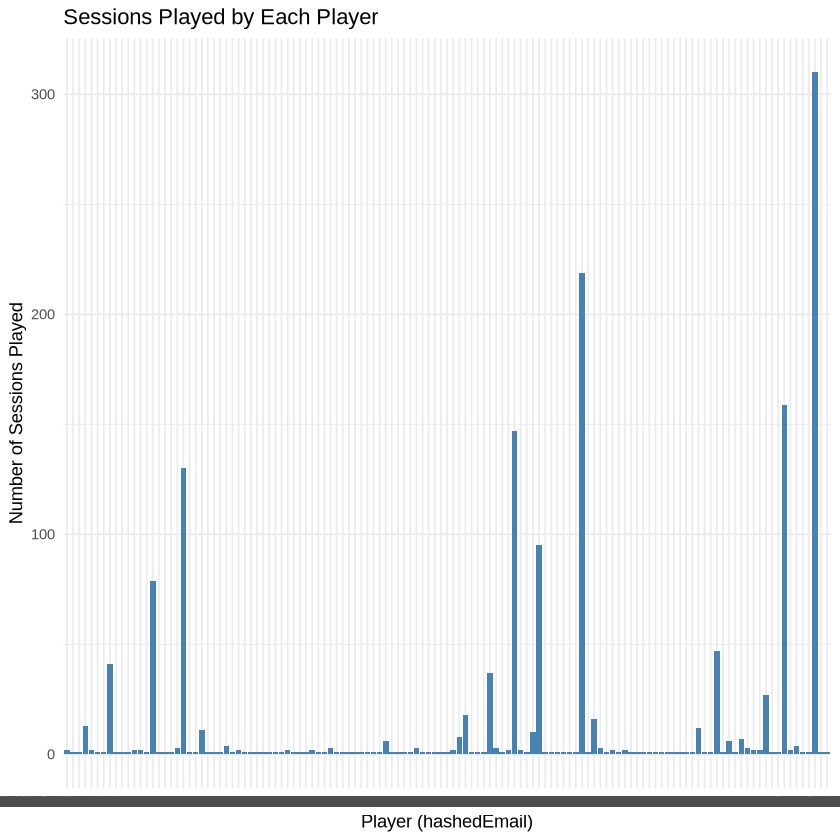

In [27]:
library(ggplot2)

# Create a bar chart for the session_count dataframe
ggplot(session_count, aes(x = hashedEmail, y = sessions_played)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # stat="identity" uses actual values
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +  # Rotate x-axis labels for better readability
  labs(title = "Sessions Played by Each Player",
       x = "Player (hashedEmail)",
       y = "Number of Sessions Played") +
  theme_minimal()  # Optional: To make the plot more visually appealing


In [28]:
combined_data <- org_players_data |>
  left_join(session_count, by = "hashedEmail")

# View the first few rows of the combined dataframe
head(combined_data)

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,sessions_played
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA,NA
